In [2]:
import pandas as pd
from pycaret.classification import *

In [3]:
# 데이터셋 로드
data = pd.read_csv('files/dataset/updated_starpoint(대중교통통합)(20240514)2km.csv')

# data = data[data['bld_type']=='HOUSE']

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,longitude,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,127.097912,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,126.903353,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,126.779951,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,126.840071,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,126.780077,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.4900,0.000000,214.3000,0.00,7.0,1.0,...,126.892235,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,126.923358,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,126.923795,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280
24998,서울특별시 강동구 암사동 431-8,2.500000,HOUSE,161.00,91.3200,56.720000,246.7900,153.29,8.0,1.0,...,127.137495,37.552449,0.270,0.044,0.081,0.318,0.055,0.366,0.329,0.269


<Axes: >

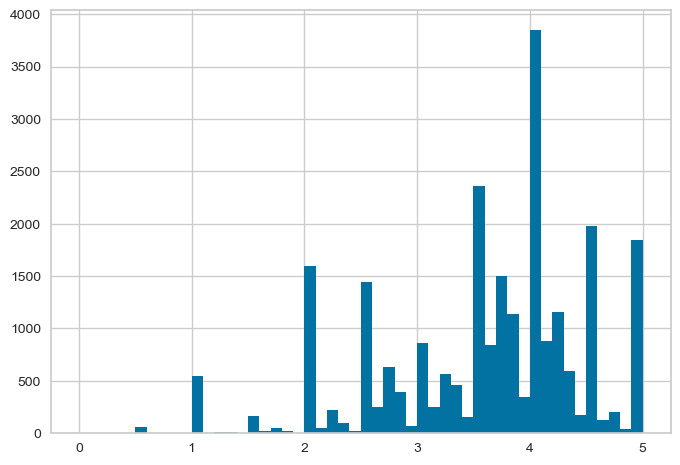

In [44]:
import numpy as np

# 'avg_score'의 최솟값과 최댓값을 기준으로 bins 배열 생성
bins = np.arange(0, data['avg_score'].max() + 0.1, 0.1)

# 히스토그램 그리기
data['avg_score'].hist(bins=bins)

In [4]:
# score 컬럼에 대해 범위 별로 라벨 할당
bins = [0.5, 1.4, 2.3, 3.2, 4.1, 5.0]  # 점수 범위
labels = [0, 1, 2, 3, 4]  # 할당할 라벨
data['label'] = pd.cut(data['avg_score'], bins=bins, labels=labels, include_lowest=True, right=False)

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.4900,0.000000,214.3000,0.00,7.0,1.0,...,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231,1
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1
24998,서울특별시 강동구 암사동 431-8,2.500000,HOUSE,161.00,91.3200,56.720000,246.7900,153.29,8.0,1.0,...,37.552449,0.270,0.044,0.081,0.318,0.055,0.366,0.329,0.269,2


<Axes: >

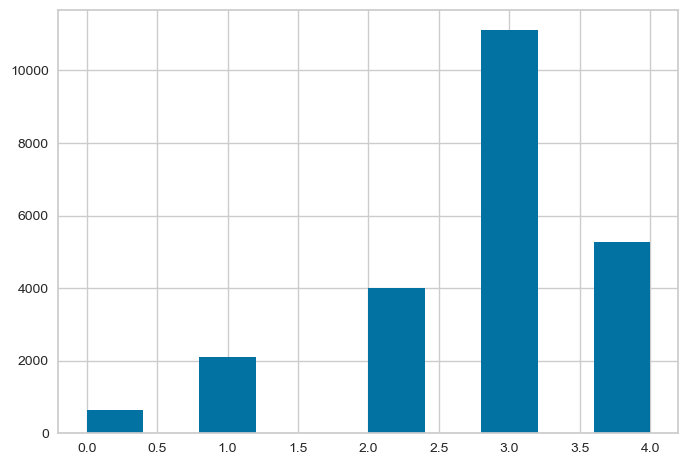

In [92]:
data['label'].hist()

In [5]:
# 머지된 데이터 프레임 결측치 있는 행 제거 및 지정된 컬럼이 0인 값 제거
data.dropna(axis=0,inplace=True)

data

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,서울특별시 구로구 구로동 28-5,1.500000,HOUSE,0.00,65.4900,0.000000,214.3000,0.00,7.0,1.0,...,37.505194,0.127,0.026,0.057,0.219,0.347,0.352,0.295,0.231,1
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1
24998,서울특별시 강동구 암사동 431-8,2.500000,HOUSE,161.00,91.3200,56.720000,246.7900,153.29,8.0,1.0,...,37.552449,0.270,0.044,0.081,0.318,0.055,0.366,0.329,0.269,2


In [6]:
# 모든 지정된 컬럼들이 0이 아닌 행만 필터링
filtered_to_use_ai_not_zero = data[(data[['hhld_cnt', 'tot_area', 'bc_rat', 'vl_rat']] != 0).all(axis=1)]

filtered_to_use_ai_not_zero

,plat_plc,avg_score,bld_type,plat_area,arch_area,bc_rat,tot_area,vl_rat,hhld_cnt,main_bld_cnt,...,latitude,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label
0,서울특별시 송파구 석촌동 1-6,3.487179,OFFICETEL,693.70,414.5700,59.760000,4398.4800,475.42,63.0,1.0,...,37.506006,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3
1,광주광역시 북구 용봉동 1468,3.600000,APARTMENT,27677.20,4825.5706,17.435183,96645.0666,273.24,642.0,8.0,...,35.179037,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3
2,경기도 고양시 일산동구 중산동 1601-2,4.250000,HOUSE,211.00,124.8500,59.170000,440.0900,149.40,16.0,1.0,...,37.685435,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4
3,서울특별시 구로구 천왕동 280,4.125000,APARTMENT,27467.50,6252.6000,22.760000,74539.6800,170.76,571.0,12.0,...,37.487681,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4
4,경기도 고양시 일산동구 중산동 1585-5,4.000000,HOUSE,200.90,120.3800,59.920000,328.4900,163.51,8.0,1.0,...,37.686948,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,서울특별시 강서구 화곡동 400-51,2.500000,HOUSE,256.10,123.4000,48.180000,701.0300,244.14,13.0,1.0,...,37.538126,0.185,0.050,0.271,0.464,0.170,0.870,0.266,0.022,2
24994,부산광역시 부산진구 전포동 191-689,2.500000,HOUSE,77.94,58.7700,75.400000,235.0600,301.59,8.0,1.0,...,35.158877,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033,2
24996,서울특별시 영등포구 신길동 449-3,2.000000,HOUSE,366.90,190.0600,51.800000,1260.1000,292.12,15.0,1.0,...,37.512721,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1
24997,서울특별시 관악구 신림동 1583-11,1.500000,HOUSE,78.39,44.9100,57.290000,173.9500,166.14,1.0,1.0,...,37.481227,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1


In [7]:
filtered_to_use_ai_not_zero['pkng_cnt_per_hhld_cnt'] = filtered_to_use_ai_not_zero.apply(lambda row: row['tot_pkng_cnt'] / row['hhld_cnt'], axis=1)

# 총 주차대수, 세대(가구,호) 컬럼 제거
filtered_to_use_ai_not_zero.drop(['bld_type','longitude','latitude','plat_plc','new_plat_plc','avg_score','tot_pkng_cnt', 'hhld_cnt','main_bld_cnt'], axis=1, inplace=True)

filtered_to_use_ai_not_zero

,plat_area,arch_area,bc_rat,tot_area,vl_rat,official_price,crime_rank,nearest_medical_related,nearest_academy_related,nearest_laundry_related,nearest_market_related,nearest_park_related,nearest_library_related,nearest_school_related,nearest_transit_related,label,pkng_cnt_per_hhld_cnt
0,693.70,414.5700,59.760000,4398.4800,475.42,11930000.0,3,0.096,0.084,0.043,0.219,0.168,0.354,0.261,0.118,3,0.650794
1,27677.20,4825.5706,17.435183,96645.0666,273.24,1020000.0,4,0.202,0.000,0.152,0.520,0.128,1.150,0.082,0.223,3,1.241433
2,211.00,124.8500,59.170000,440.0900,149.40,1192000.0,3,0.162,0.075,0.400,0.530,0.044,0.929,0.184,0.098,4,0.187500
3,27467.50,6252.6000,22.760000,74539.6800,170.76,3661000.0,3,0.141,0.112,0.350,0.512,0.264,1.393,0.238,0.138,4,1.217163
4,200.90,120.3800,59.920000,328.4900,163.51,1617000.0,3,0.056,0.095,0.260,0.665,0.132,0.771,0.287,0.115,3,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24989,256.10,123.4000,48.180000,701.0300,244.14,5097000.0,2,0.185,0.050,0.271,0.464,0.170,0.870,0.266,0.022,2,0.461538
24994,77.94,58.7700,75.400000,235.0600,301.59,988600.0,5,0.322,0.126,0.187,0.935,0.110,0.854,0.450,0.033,2,0.000000
24996,366.90,190.0600,51.800000,1260.1000,292.12,5478000.0,4,0.081,0.080,0.394,0.040,0.317,1.040,0.362,0.077,1,0.800000
24997,78.39,44.9100,57.290000,173.9500,166.14,4033000.0,3,0.218,0.163,0.102,0.366,0.084,1.420,0.220,0.280,1,1.000000


In [10]:
from pycaret.classification import *
from imblearn.over_sampling import SMOTE

# 데이터 준비 및 SMOTE 인스턴스 생성
smote = SMOTE(sampling_strategy='auto', random_state=1234)

# PyCaret 설정 초기화
reg_setup = setup(filtered_to_use_ai_not_zero, target='label',
                  train_size=0.7,
                  normalize=True,
                  session_id=1234,
                  data_split_stratify=True,
                  verbose=True,  # 자세한 로그 정보 출력
                  ignore_features=['bc_rat', 'vl_rat', 'tot_area', 'nearest_park_related', 'nearest_transit_related', 'pkng_cnt_per_hhld_cnt', 'nearest_market_related', 'plat_area', 'arch_area', 'medical_related_number', 'transit_related_number', 'laundry_related_number', 'market_related_number', 'park_related_number', 'library_related_number', 'nearest_library_related', 'academy_related_number', 'nearest_kindergarden_related', 'nearest_elementary_school_related', 'nearest_academy_related', 'kindergarden_related_number', 'elementary_school_related_number', 'middle_school_related_number', 'nearest_middle_school_related', 'high_school_related_number', 'nearest_high_school_related', 'university_related_number', 'nearest_university_related', 'nearest_medical_related']
                 )


,Description,Value
0,Session id,1234
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(17502, 17)"
4,Transformed data shape,"(17502, 5)"
5,Transformed train set shape,"(12251, 5)"
6,Transformed test set shape,"(5251, 5)"
7,Ignore features,29
8,Numeric features,4
9,Preprocess,True


In [12]:
# 모델 비교
best_model = compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5003,0.4950,0.5003,0.4191,0.3875,0.0904,0.1292,0.5320
ada,Ada Boost Classifier,0.4992,0.5015,0.4992,0.3886,0.3760,0.0813,0.1216,0.0430
lr,Logistic Regression,0.4935,0.5264,0.4935,0.3460,0.3317,0.0103,0.0455,0.4750
ridge,Ridge Classifier,0.4928,0.0000,0.4928,0.3697,0.3280,0.0053,0.0338,0.0070
lda,Linear Discriminant Analysis,0.4922,0.5250,0.4922,0.3142,0.3278,0.0062,0.0334,0.0060
dummy,Dummy Classifier,0.4916,0.5000,0.4916,0.2417,0.3241,0.0000,0.0000,0.0060
nb,Naive Bayes,0.4876,0.5038,0.4876,0.3200,0.3367,0.0182,0.0443,0.0060
lightgbm,Light Gradient Boosting Machine,0.4876,0.5051,0.4876,0.3946,0.3920,0.0848,0.1088,0.4910
svm,SVM - Linear Kernel,0.4873,0.0000,0.4873,0.3253,0.3501,0.0368,0.0663,0.0180
qda,Quadratic Discriminant Analysis,0.4871,0.5034,0.4871,0.3232,0.3398,0.0208,0.0469,0.0070


In [14]:
# 훈련모델 평가
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.classification import tune_model

# 모델 튜닝
tuned_model = tune_model(
    best_model,
    optimize='Accuracy',  # 최적화할 평가 지표
#     search_algorithm='grid',  # 검색 알고리즘을 'grid'로 설정
#     choose_better=True,       # 더 나은 모델 선택 활성화
#     verbose=True              # 진행 과정 출력
)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4951,0.5077,0.4951,0.4045,0.3937,0.0898,0.1198
1,0.4963,0.5024,0.4963,0.4251,0.3884,0.0821,0.1153
2,0.4980,0.5167,0.4980,0.3830,0.3939,0.0995,0.1302
3,0.5020,0.4964,0.5020,0.4139,0.3993,0.0942,0.1288
4,0.4882,0.4989,0.4882,0.3795,0.3861,0.0787,0.1041
5,0.4988,0.4936,0.4988,0.3987,0.3922,0.0947,0.1287
6,0.5012,0.5087,0.5012,0.4049,0.3950,0.0969,0.1322
7,0.4792,0.5002,0.4792,0.3710,0.3790,0.0648,0.0852
8,0.4914,0.4947,0.4914,0.3895,0.3944,0.0906,0.1161


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# 모델 최종화 및 예측
predictions = predict_model(tuned_model)
predictions

In [19]:
# 예측 파일 뽑아 보기
predictions.to_csv("predict.csv",encoding='cp949',index=False)

In [105]:
# 모델 저장
save_model(best_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['bc_rat', 'vl_rat',
                                              'official_price', 'crime_rank',
                                              'nearest_medical_related',
                                              'nearest_laundry_related',
                                              'nearest_market_related',
                                              'nearest_park_related',
                                              'nearest_transit_related',
                                              'pkng_cnt_per_hhld_cnt'],
                                     transformer=SimpleImputer(add_indicator=Fals...
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                      